In [17]:
import numpy as np
import pandas as pd
from pyBibX.base import pbx_probe
from tabulate import tabulate
from google.colab import data_table

ModuleNotFoundError: No module named 'google.colab'

In [13]:
# Load bib file
# Arguments for pbx_probe: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
# Note: the other arguments lead to an key error for some reason 
file_path = './example.bib'
database = 'wos'
bibfile = pbx_probe(file_bib = file_path)

A Total of 128 Documents were Found ( 129 Documents and 1 Duplicates )

SSRN Scholarly Paper = 1
Tesi di Laurea in Management = 1
UNKNOW = 126


In [14]:
# eda_bib() method creates a generic report of the bib file (EDA = Exploratory Data Analysis)
report = bibfile.eda_bib()

report

,Main Information,Results
0,Timespan,0-2023
1,Total Number of Countries,1
2,Total Number of Institutions,1
3,Total Number of Sources,69
4,Total Number of References,0
5,Total Number of Languages,8
6,--de (# of docs),4
7,--de-ch (# of docs),1
8,--de-de (# of docs),2
9,--en (# of docs),78


In [16]:
# The metadata can be reviewed and manually modified. If you need to make adjustments, you can directly edit the bibfile.data, which is a DataFrame containing all the utilized information.
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))

+----+-----------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+---------------+----

In [19]:
# Check Docs IDs per Type
docIDs = pd.DataFrame(bibfile.id_doc_types())
print(docIDs)

                 Document Types  \
0          SSRN Scholarly Paper   
1  Tesi di Laurea in Management   
2                        UNKNOW   

                                                 IDs  
0                                               [38]  
1                                               [65]  
2  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  


In [21]:
# Check Docs IDs per Type
docIDperType = pd.DataFrame(bibfile.id_doc_types())
print(docIDperType)

                 Document Types  \
0          SSRN Scholarly Paper   
1  Tesi di Laurea in Management   
2                        UNKNOW   

                                                 IDs  
0                                               [38]  
1                                               [65]  
2  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  


In [22]:
# Check Authors IDs
authID = pd.DataFrame(bibfile.table_id_aut)
print(authID)

        ID               Author
0      a_0  aguado, juan-miguel
1      a_1          avoyan, ala
2      a_2     bailey, jason m.
3      a_3             bao, lei
4      a_4   bartolomei, matteo
..     ...                  ...
124  a_124      zanescu, andrei
125  a_125    zeadally, sherali
126  a_126      zhang, haocheng
127  a_127            zhu, feng
128  a_128       zilberman, noa

[129 rows x 2 columns]


In [23]:
# Check Countries IDs
countryID = pd.DataFrame(bibfile.table_id_ctr)
print(countryID)

    ID Country
0  c_0  UNKNOW


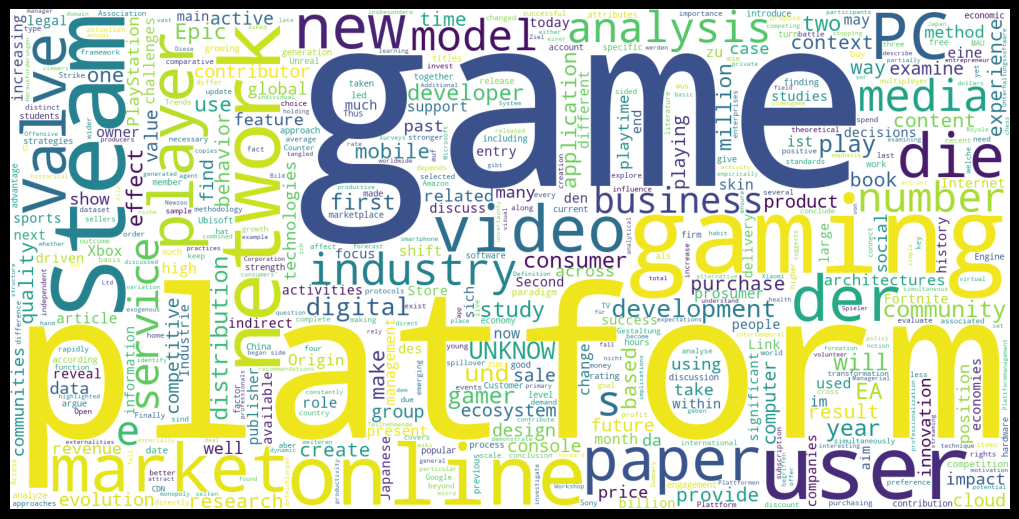

In [24]:
# WordCloud from Abstracts
# other arguments: abs=abstract, title=title, kwa=keywords, kwp=keywords_plus
bibfile.word_cloud_plot(entry='abs')

In [5]:
# attempt at adding detailed citation data
import numpy as np
import pandas as pd
from pyBibX.base import pbx_probe
from tabulate import tabulate
from prettytable import PrettyTable
file_path = './example02.bib'
database = 'scopus'
bibfile = pbx_probe(file_bib = file_path)

A Total of 261 Documents were Found ( 263 Documents and 2 Duplicates )

Article = 179
Article in Press = 1
Book Chapter = 12
Conference Paper = 64
Conference Review = 3
Review = 2


In [7]:
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import bibtexparser
import re

# File paths
csv_file_path = 'bib-Files-raw\scopusref02.csv'
bib_file_path = 'bib-Files-raw\scopus02.bib'
output_bib_path = 'cleaned.bib'

# Load the CSV file
csv_data = pd.read_csv(csv_file_path, encoding='utf-8')

# filling missing values to avoid float errors
csv_data['DOI'] = csv_data['DOI'].astype(str)
csv_data['References'] = csv_data['References'].astype(str)

# Standardize DOI in the CSV
csv_data['DOI'] = csv_data['DOI'].str.strip().str.lower()

# Ensure the CSV has the necessary columns
if 'DOI' not in csv_data.columns or 'References' not in csv_data.columns:
    raise ValueError("CSV must contain 'DOI' and 'References' columns.")

# Load the existing BibTeX file
with open(bib_file_path, 'r', encoding='utf-8') as bib_file:
    bib_database = bibtexparser.load(bib_file)

# Create a dictionary of existing BibTeX entries by DOI (lowercased)
doi_to_entry = {entry.get('doi', '').lower(): entry for entry in bib_database.entries}

# Track updates
updated_entries_count = 0

# Iterate over the CSV rows
for _, row in csv_data.iterrows():
    doi = str(row['DOI']).strip().lower()
    reference_text = row['References'].strip()

    # Skip if DOI is missing
    if not doi or doi not in doi_to_entry:
        continue

    # Get the corresponding BibTeX entry
    entry = doi_to_entry[doi]

    # Append the reference text to the 'note' or 'annote' field
    entry['references'] = reference_text

    updated_entries_count += 1


# Write the updated BibTeX file
with open(output_bib_path, 'w', encoding='utf-8') as output_bib_file:
    bibtexparser.dump(bib_database, output_bib_file)

cleaned_content = re.sub(r'@comment.*\n', '', output_bib_file, flags=re.IGNORECASE)

# Save the cleaned content to a new BibTeX file (optional)
with open(output_bib_path, 'w', encoding='utf-8') as output_bib_file:
    output_bib_file.write(cleaned_content)

print(f"Updated BibTeX file saved to '{output_bib_path}'. Updated {updated_entries_count} entries.")



<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bicic\AppData\Local\Temp\ipykernel_2112\3655519521.py:6: SyntaxWarning: invalid escape sequence '\s'
  csv_file_path = 'bib-Files-raw\scopusref02.csv'
C:\Users\bicic\AppData\Local\Temp\ipykernel_2112\3655519521.py:7: SyntaxWarning: invalid escape sequence '\s'
  bib_file_path = 'bib-Files-raw\scopus02.bib'
C:\Users\bicic\AppData\Local\Temp\ipykernel_2112\3655519521.py:6: SyntaxWarning: invalid escape sequence '\s'
  csv_file_path = 'bib-Files-raw\scopusref02.csv'
C:\Users\bicic\AppData\Local\Temp\ipykernel_2112\3655519521.py:7: SyntaxWarning: invalid escape sequence '\s'
  bib_file_path = 'bib-Files-raw\scopus02.bib'


TypeError: expected string or bytes-like object, got '_io.TextIOWrapper'

In [24]:
print(tabulate(doi_to_entry, headers = 'keys', tablefmt = 'psql'))

+---------------------------------+---------------------------------+------------------------------+----------------------------+-----------------------------+---------------------------------+------------------------------+-----------------------------+----------------------------------+---------------------------+-------------------------------+------------------------------+---------------------------------+---------------------+--------------------------------+-----------------------------+-----------------------------+-------------------------------+------------------------------+-----------------------------+-------------------------------+-----------------------------------+-------------------------+------------------------+-------------------------------------+------------------------+------------------------+-----------------------------+------------------------+-----------------------+-----------------------+------------------------------+-------------------------------+-----